# Merging and Cleaning

- merging sql database with pandas df

In [1]:
import pandas as pd
from matplotlib.ticker import StrMethodFormatter

In [2]:
!ls ../zippedData/

bom.movie_gross.csv.gz
im.db
im.db.zip
im2.db
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


In [3]:
bom = pd.read_csv('../zippedData/bom.movie_gross.csv.gz')
tmdb_df = pd.read_csv('../zippedData/tmdb.movies.csv.gz')
tn = pd.read_csv('../zippedData/tn.movie_budgets.csv.gz')

# Box Office Mojo Cleaning

In [4]:
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
bom['movie year'] = bom['title'] +" "+ bom['year'].astype(str)

In [6]:
bom.head()

,title,studio,domestic_gross,foreign_gross,year,movie year
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 3 2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,Alice in Wonderland (2010) 2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,Harry Potter and the Deathly Hallows Part 1 2010
3,Inception,WB,292600000.0,535700000,2010,Inception 2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After 2010


# TMDB Cleaning

In [7]:
tmdb_df.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [8]:
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [9]:
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'], format='%Y-%m-%d')

In [10]:
tmdb_df['movie year'] = tmdb_df['title'] + ' ' + tmdb_df['release_date'].dt.year.astype(str)

In [11]:
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,movie year
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Harry Potter and the Deathly Hallows: Part 1 2010
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,How to Train Your Dragon 2010
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Iron Man 2 2010
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,Toy Story 1995
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,Inception 2010


# The Numbers Cleaning

In [12]:
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [13]:
tn['release_date'] = pd.to_datetime(tn['release_date'], format='%b %d, %Y')

In [14]:
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [15]:
tn['movie year'] = tn['movie'] + ' ' + tn['release_date'].dt.year.astype(str)

In [16]:
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie year
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Avatar 2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides 2011
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Dark Phoenix 2019
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Avengers: Age of Ultron 2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Star Wars Ep. VIII: The Last Jedi 2017


# Cleaning data from clean data

In [17]:
bom_clean = bom.dropna()

- dropping null values, Microsoft is worldwide so they would be interested in movies with a worlwide audience
- movies with no domestic or foreign gross means they did not make any money meaning they were not shown at all

### Making sure there are no duplicates or nulls
- getting rid of duplictes based on popularity

In [18]:
bom_clean.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
movie year        0
dtype: int64

In [19]:
bom_clean['movie year'].duplicated().sum()

0

In [20]:
bom_clean.head()

,title,studio,domestic_gross,foreign_gross,year,movie year
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 3 2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,Alice in Wonderland (2010) 2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,Harry Potter and the Deathly Hallows Part 1 2010
3,Inception,WB,292600000.0,535700000,2010,Inception 2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After 2010


In [21]:
tmdb_df.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
movie year           0
dtype: int64

In [22]:
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,movie year
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Harry Potter and the Deathly Hallows: Part 1 2010
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,How to Train Your Dragon 2010
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Iron Man 2 2010
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,Toy Story 1995
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,Inception 2010


In [23]:
tmdb_df['movie year'].duplicated().sum()

1120

In [24]:
clean_tmdb = tmdb_df.sort_values('vote_count', ascending=False).drop_duplicates('movie year', keep='first')

In [25]:
clean_tmdb.duplicated().sum()

0

In [26]:
clean_tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,movie year
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,Inception 2010
17383,17383,"[28, 12, 35]",293660,en,Deadpool,35.067,2016-02-12,Deadpool,7.6,20175,Deadpool 2016
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673,The Avengers 2012
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676,Avatar 2009
11032,11032,"[12, 18, 878]",157336,en,Interstellar,28.440,2014-11-05,Interstellar,8.2,18597,Interstellar 2014


In [27]:
tn.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
movie year           0
dtype: int64

In [28]:
tn = tn.drop_duplicates('movie year', keep='first')

In [29]:
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie year
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Avatar 2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides 2011
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Dark Phoenix 2019
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Avengers: Age of Ultron 2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Star Wars Ep. VIII: The Last Jedi 2017


- again dropping null values since we want a worldwide audience

# Cleaning IMDB data

In [30]:
imdb = pd.read_csv('../imdbCSV.csv')
imdb.head()

,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id.1,averagerating,numvotes,movie_id.2,person_id,person_id.1,primary_name,birth_year,death_year,primary_profession
0,0,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066,tt1375666,nm0634240,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director"
1,1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",tt1345836,8.4,1387769,tt1345836,nm0634240,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director"
2,2,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",tt0816692,8.6,1299334,tt0816692,nm0634240,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director"
3,3,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",tt1853728,8.4,1211405,tt1853728,nm0000233,nm0000233,Quentin Tarantino,1963.0,NaN,"writer,actor,producer"
4,4,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",tt0848228,8.1,1183655,tt0848228,nm0923736,nm0923736,Joss Whedon,1964.0,NaN,"writer,producer,director"


- getting relevant data

In [31]:
rel_imdb = imdb[['primary_title', 'genres', 'averagerating', 'numvotes', 'primary_name']]

In [32]:
rel_imdb.isna().sum()

primary_title      0
genres           798
averagerating      0
numvotes           0
primary_name       0
dtype: int64

In [33]:
rel_imdb = rel_imdb.dropna()

In [34]:
rel_imdb['genres'] = rel_imdb['genres'].str.split(',')

In [35]:
rel_imdb = rel_imdb.explode('genres')

In [36]:
rel_imdb.head()

,primary_title,genres,averagerating,numvotes,primary_name
0,Inception,Action,8.8,1841066,Christopher Nolan
0,Inception,Adventure,8.8,1841066,Christopher Nolan
0,Inception,Sci-Fi,8.8,1841066,Christopher Nolan
1,The Dark Knight Rises,Action,8.4,1387769,Christopher Nolan
1,The Dark Knight Rises,Thriller,8.4,1387769,Christopher Nolan


- higher vote counts would mean more people saw the movie, giving us the 'popular movie'
- then we can compare this to genre, giving most popular genre

In [37]:
gen_vs_pop = rel_imdb.groupby('genres')['numvotes'].mean().sort_values()[::-1]

In [38]:
genre = gen_vs_pop.index

In [39]:
genre_values = gen_vs_pop.values

## Getting popularity vs genre 

In [40]:
import matplotlib.pyplot as plt

<ipython-input-41-0498c22f9741>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genre, rotation=45)


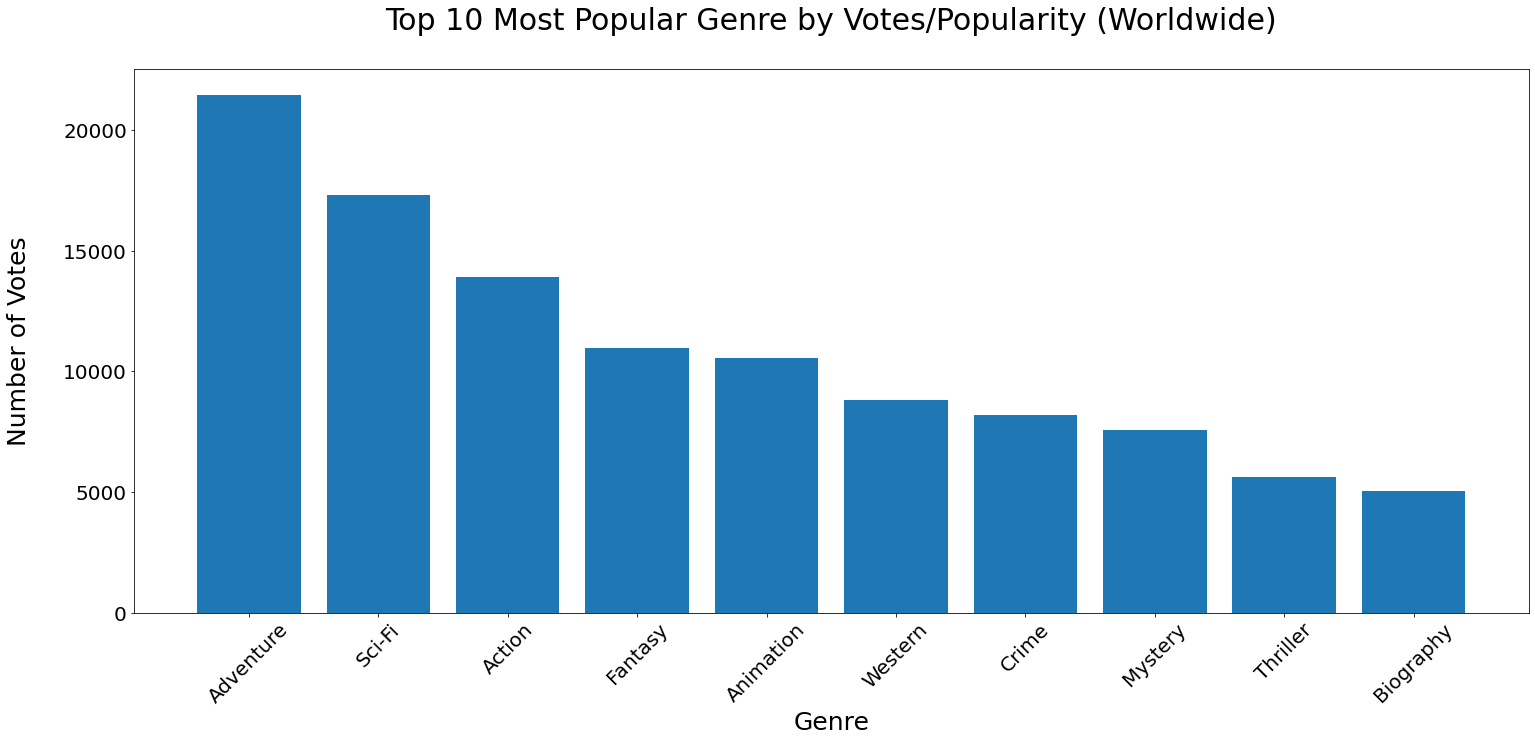

In [41]:
fi, ax = plt.subplots(figsize =(25, 10))
ax.bar(genre[:10] , genre_values[:10])

ax.set_title('Top 10 Most Popular Genre by Votes/Popularity (Worldwide)\n', fontsize = 30)
ax.set_xlabel('Genre', fontsize=25)
ax.set_ylabel('Number of Votes\n', fontsize=25)
ax.set_xticklabels(genre, rotation=45)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

# Most Popular studios
- will have to merge with bom to get studios

In [42]:
bom_clean.head()

,title,studio,domestic_gross,foreign_gross,year,movie year
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 3 2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,Alice in Wonderland (2010) 2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,Harry Potter and the Deathly Hallows Part 1 2010
3,Inception,WB,292600000.0,535700000,2010,Inception 2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After 2010


In [43]:
imdb.head()

,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id.1,averagerating,numvotes,movie_id.2,person_id,person_id.1,primary_name,birth_year,death_year,primary_profession
0,0,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066,tt1375666,nm0634240,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director"
1,1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",tt1345836,8.4,1387769,tt1345836,nm0634240,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director"
2,2,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",tt0816692,8.6,1299334,tt0816692,nm0634240,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director"
3,3,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",tt1853728,8.4,1211405,tt1853728,nm0000233,nm0000233,Quentin Tarantino,1963.0,NaN,"writer,actor,producer"
4,4,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",tt0848228,8.1,1183655,tt0848228,nm0923736,nm0923736,Joss Whedon,1964.0,NaN,"writer,producer,director"


In [44]:
relevant_col = imdb[['primary_title', 'start_year', 'numvotes', 'averagerating']]

In [45]:
relevant_col['movie year'] = relevant_col['primary_title'] + " " + relevant_col['start_year'].astype(str)

<ipython-input-45-c54208553c70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_col['movie year'] = relevant_col['primary_title'] + " " + relevant_col['start_year'].astype(str)


In [46]:
relevant_col.head()

,primary_title,start_year,numvotes,averagerating,movie year
0,Inception,2010,1841066,8.8,Inception 2010
1,The Dark Knight Rises,2012,1387769,8.4,The Dark Knight Rises 2012
2,Interstellar,2014,1299334,8.6,Interstellar 2014
3,Django Unchained,2012,1211405,8.4,Django Unchained 2012
4,The Avengers,2012,1183655,8.1,The Avengers 2012


## Merging bom and imdb by movie year
- we can get studios and then sort by popularity

In [47]:
bom_imdb = bom.merge(relevant_col, on='movie year')

In [48]:
bom_imdb.shape

(2078, 10)

In [49]:
bom_imdb.drop_duplicates('movie year', keep='first').shape

(1822, 10)

- we will lose aorund 12% of data, we will still have 1822 movies to gather data from
- i think this is fine, its enough movies to get reliable data

In [50]:
bom_imdb = bom_imdb.sort_values('numvotes', ascending=False)

In [51]:
bom_imdb_clean = bom_imdb.drop_duplicates('movie year', keep='first')

In [52]:
bom_imdb_clean.head()

,title,studio,domestic_gross,foreign_gross,year,movie year,primary_title,start_year,numvotes,averagerating
1,Inception,WB,292600000.0,535700000,2010,Inception 2010,Inception,2010,1841066,8.8
483,The Dark Knight Rises,WB,448100000.0,636800000,2012,The Dark Knight Rises 2012,The Dark Knight Rises,2012,1387769,8.4
960,Interstellar,Par.,188000000.0,489400000,2014,Interstellar 2014,Interstellar,2014,1299334,8.6
498,Django Unchained,Wein.,162800000.0,262600000,2012,Django Unchained 2012,Django Unchained,2012,1211405,8.4
745,The Wolf of Wall Street,Par.,116900000.0,275100000,2013,The Wolf of Wall Street 2013,The Wolf of Wall Street,2013,1035358,8.2


In [53]:
bom_imdb_clean.sort_values('numvotes', ascending=False)['studio'].value_counts()[:10]

Uni.    123
Fox     113
WB      102
BV       83
Sony     80
Par.     78
LGF      77
Eros     71
FoxS     55
IFC      52
Name: studio, dtype: int64

In [54]:
bom_imdb_clean['studio'].replace({'FoxS': 'Fox', 'BV': 'BV (Disney)', 'SPC': 'Sony', 'WB (NL)' : 'WB'}, inplace=True)

C:\Users\dcv_2\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


- FoxS is the same as Fox, both are Fox Studios
- Same with spc = Sony, and BV = Disney

In [55]:
pop_studios = bom_imdb_clean.groupby('studio')['numvotes'].mean().sort_values()[::-1]

In [56]:
pop_studios.head()

studio
BV (Disney)    229164.783133
P/DW           213462.000000
Par.           196643.320513
WB             195390.608392
Wein.          166325.000000
Name: numvotes, dtype: float64

<ipython-input-57-15ea31d4fafe>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(pop_studios.index[:10], rotation=45)


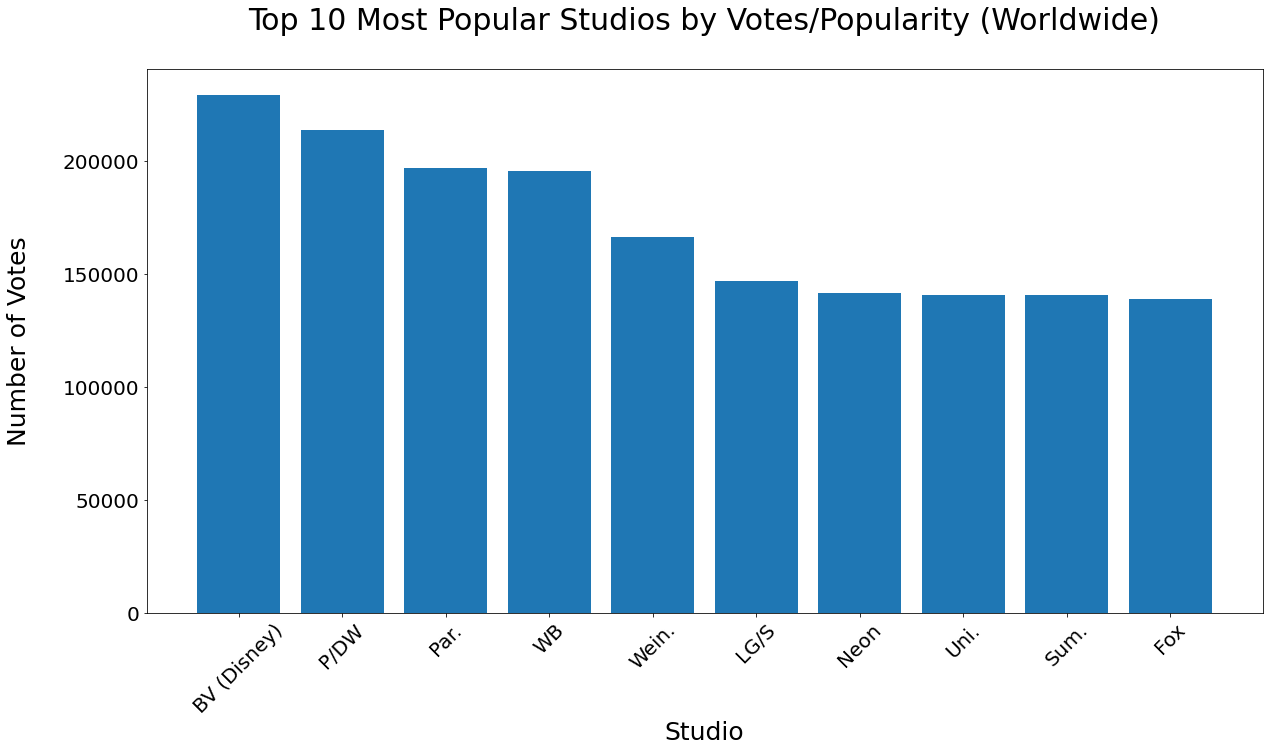

In [57]:
fig3, ax3 = plt.subplots(figsize=(20, 10))
ax3.bar(pop_studios.index[:10], pop_studios.values[:10])

ax3.set_title('Top 10 Most Popular Studios by Votes/Popularity (Worldwide)\n', fontsize = 30)
ax3.set_xlabel('Studio', fontsize=25)
ax3.set_ylabel('Number of Votes\n', fontsize=25)
ax3.set_xticklabels(pop_studios.index[:10], rotation=45)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

- P/DW, Dreamworks
- Par., Paramount
- WB, Warner Brothers
- Wein, Weinster
- Sum., Summit
- LG/S, Lionsgate

# Seaborn versions of graphs

In [58]:
studios = ['Disney', 'DreamWorks', 'Paramount', 'Warner B.', 'Weinstein', 'Lionsgate', 'Neon', 'Universal', 'Summit Ent.', 'Fox']


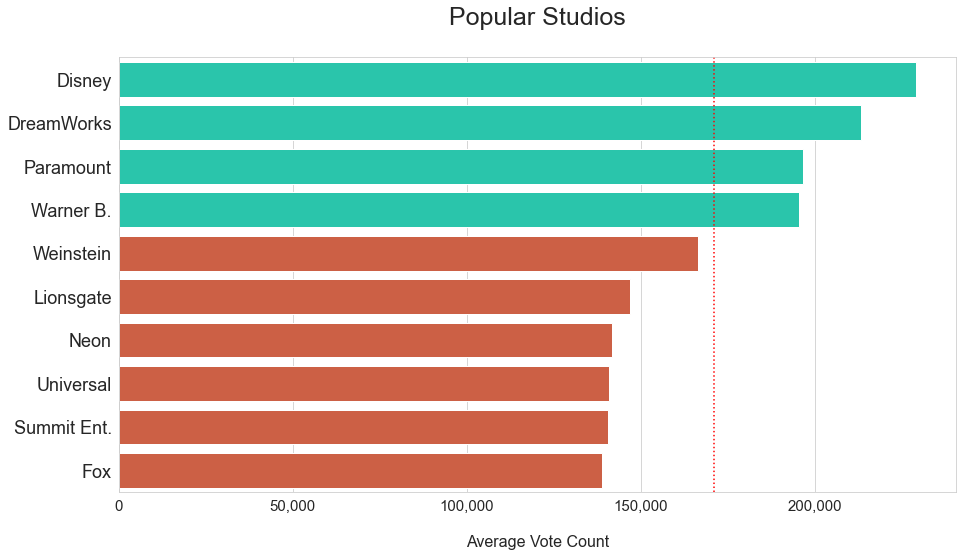

In [82]:
import seaborn as sns
import numpy as np
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')

pop_mean = pop_studios.values[:10].mean()

col = np.where(pop_studios.values[:10] > pop_mean, '#10DFBC', '#E2522F')

ax4 = sns.barplot(y=studios, 
                      x=pop_studios.values[:10], 
                      orient='h', 
                      palette = col)
ax4.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
#palette=sns.blend_palette(['#76BA1B', '#1E5631'], 10)
plt.title('Popular Studios\n', fontsize = 25)
plt.ylabel('')
plt.xlabel('\nAverage Vote Count', fontsize = 16)
plt.yticks(fontsize=18)
plt.xticks(fontsize=15)
plt.axvline(pop_mean, color='red', ls='dotted');

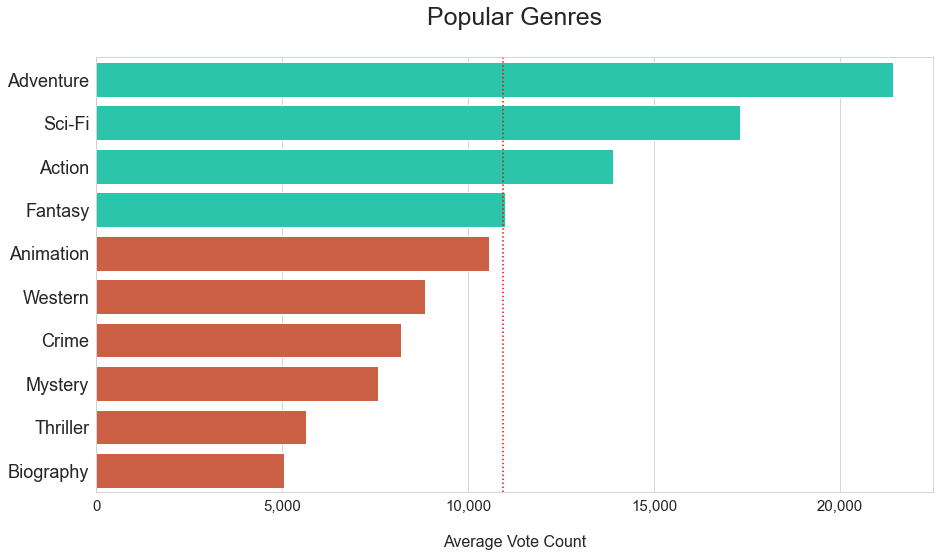

In [83]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')

gen_mean = genre_values[:10].mean()

c = np.where(genre_values[:10] > gen_mean, '#10DFBC', '#E2522F')

ax5 = sns.barplot(y=genre[:10], 
                      x=genre_values[:10], 
                      orient='h', 
                      palette=c)
ax5.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title('Popular Genres\n', fontsize = 25)
plt.ylabel('')
plt.xlabel('\nAverage Vote Count', fontsize = 16)
plt.yticks(fontsize=18)
plt.xticks(fontsize=15)
plt.axvline(gen_mean, color='red', ls='dotted');

# Directors Data
- want to show popular directors and profitable directors

In [61]:
imdb.head()

,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id.1,averagerating,numvotes,movie_id.2,person_id,person_id.1,primary_name,birth_year,death_year,primary_profession
0,0,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066,tt1375666,nm0634240,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director"
1,1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",tt1345836,8.4,1387769,tt1345836,nm0634240,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director"
2,2,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",tt0816692,8.6,1299334,tt0816692,nm0634240,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director"
3,3,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",tt1853728,8.4,1211405,tt1853728,nm0000233,nm0000233,Quentin Tarantino,1963.0,NaN,"writer,actor,producer"
4,4,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",tt0848228,8.1,1183655,tt0848228,nm0923736,nm0923736,Joss Whedon,1964.0,NaN,"writer,producer,director"


In [62]:
dir_df = imdb[['primary_title', 'numvotes', 'primary_name', 'start_year']]

In [63]:
dir_df['movie year'] = dir_df['primary_title'] + " " + dir_df['start_year'].astype(str)

<ipython-input-63-8c3db98230c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dir_df['movie year'] = dir_df['primary_title'] + " " + dir_df['start_year'].astype(str)


In [64]:
dir_df.head()

,primary_title,numvotes,primary_name,start_year,movie year
0,Inception,1841066,Christopher Nolan,2010,Inception 2010
1,The Dark Knight Rises,1387769,Christopher Nolan,2012,The Dark Knight Rises 2012
2,Interstellar,1299334,Christopher Nolan,2014,Interstellar 2014
3,Django Unchained,1211405,Quentin Tarantino,2012,Django Unchained 2012
4,The Avengers,1183655,Joss Whedon,2012,The Avengers 2012


In [65]:
clean_dir_df = dir_df.sort_values(by='numvotes', ascending=False).drop_duplicates(subset=['movie year'], keep='first')
clean_dir_df.head()

,primary_title,numvotes,primary_name,start_year,movie year
0,Inception,1841066,Christopher Nolan,2010,Inception 2010
1,The Dark Knight Rises,1387769,Christopher Nolan,2012,The Dark Knight Rises 2012
2,Interstellar,1299334,Christopher Nolan,2014,Interstellar 2014
3,Django Unchained,1211405,Quentin Tarantino,2012,Django Unchained 2012
4,The Avengers,1183655,Joss Whedon,2012,The Avengers 2012


In [66]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [67]:
pop_dir = clean_dir_df.groupby('primary_name')['numvotes'].mean().sort_values()[::-1]

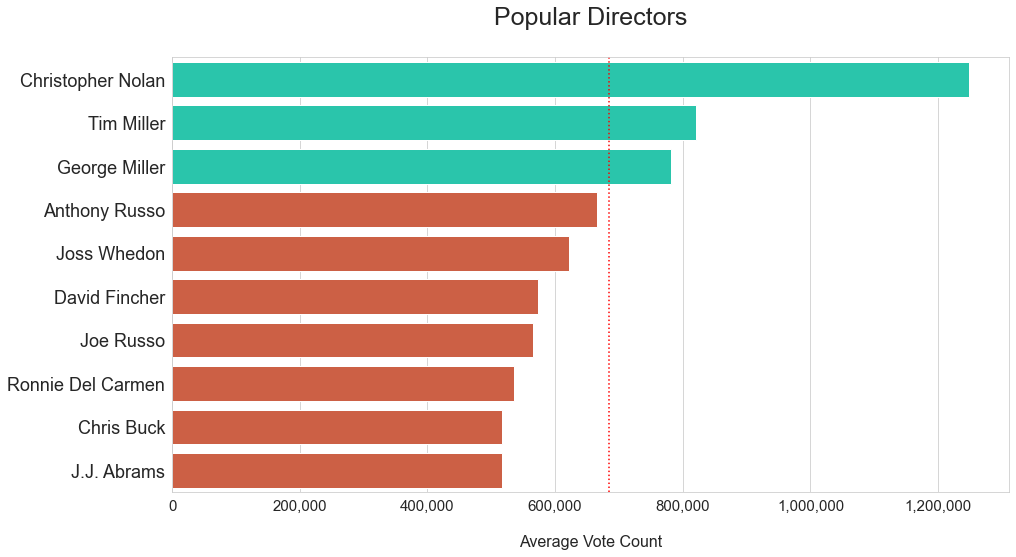

In [84]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')

dir_mean = pop_dir.values[:10].mean()

co = np.where(pop_dir.values[:10] > dir_mean, '#10DFBC', '#E2522F')

axtest = sns.barplot(y=pop_dir.index[:10], 
                      x=pop_dir.values[:10], 
                      orient='h', 
                      palette=co)
axtest.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title('Popular Directors\n', fontsize = 25)
plt.ylabel('')
plt.xlabel('\nAverage Vote Count', fontsize = 16)
plt.yticks(fontsize=18)
plt.xticks(fontsize=15)
plt.axvline(dir_mean, color='red', ls='dotted');

In [69]:
clean_dir_df.head()

,primary_title,numvotes,primary_name,start_year,movie year
0,Inception,1841066,Christopher Nolan,2010,Inception 2010
1,The Dark Knight Rises,1387769,Christopher Nolan,2012,The Dark Knight Rises 2012
2,Interstellar,1299334,Christopher Nolan,2014,Interstellar 2014
3,Django Unchained,1211405,Quentin Tarantino,2012,Django Unchained 2012
4,The Avengers,1183655,Joss Whedon,2012,The Avengers 2012


In [70]:
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie year
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Avatar 2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides 2011
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Dark Phoenix 2019
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Avengers: Age of Ultron 2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Star Wars Ep. VIII: The Last Jedi 2017


In [71]:
tn[['production_budget', 'worldwide_gross']] = tn[['production_budget', 'worldwide_gross']].replace(r'[^.0-9]', '', regex=True).astype(float)


In [72]:
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie year
0,1,2009-12-18,Avatar,425000000.00000,"$760,507,625",2776345279.00000,Avatar 2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.00000,"$241,063,875",1045663875.00000,Pirates of the Caribbean: On Stranger Tides 2011
2,3,2019-06-07,Dark Phoenix,350000000.00000,"$42,762,350",149762350.00000,Dark Phoenix 2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.00000,"$459,005,868",1403013963.00000,Avengers: Age of Ultron 2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.00000,"$620,181,382",1316721747.00000,Star Wars Ep. VIII: The Last Jedi 2017


In [73]:
tn['ww_profit'] = tn['worldwide_gross'] - tn['production_budget']

In [74]:
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie year,ww_profit
0,1,2009-12-18,Avatar,425000000.00000,"$760,507,625",2776345279.00000,Avatar 2009,2351345279.00000
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.00000,"$241,063,875",1045663875.00000,Pirates of the Caribbean: On Stranger Tides 2011,635063875.00000
2,3,2019-06-07,Dark Phoenix,350000000.00000,"$42,762,350",149762350.00000,Dark Phoenix 2019,-200237650.00000
3,4,2015-05-01,Avengers: Age of Ultron,330600000.00000,"$459,005,868",1403013963.00000,Avengers: Age of Ultron 2015,1072413963.00000
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.00000,"$620,181,382",1316721747.00000,Star Wars Ep. VIII: The Last Jedi 2017,999721747.00000


In [75]:
tn_rel = tn[['movie', 'ww_profit', 'movie year']]

In [76]:
tn_rel.shape

(5781, 3)

- merging to get most profitable directors

In [77]:
profit_dir = clean_dir_df.merge(tn_rel, on='movie year').sort_values(by='ww_profit', ascending=False).drop_duplicates(subset=['movie year'], keep='first')


In [78]:
profit_dir.head()

,primary_title,numvotes,primary_name,start_year,movie year,movie,ww_profit
18,Avengers: Infinity War,670926,Joe Russo,2018,Avengers: Infinity War 2018,Avengers: Infinity War,1748134200.00000
45,Jurassic World,539338,Colin Trevorrow,2015,Jurassic World 2015,Jurassic World,1433854864.00000
130,Furious 7,335074,James Wan,2015,Furious 7 2015,Furious 7,1328722794.00000
4,The Avengers,1183655,Joss Whedon,2012,The Avengers 2012,The Avengers,1292935897.00000
57,Black Panther,516148,Ryan Coogler,2018,Black Panther 2018,Black Panther,1148258224.00000


In [79]:
money_dir = profit_dir.groupby('primary_name')['ww_profit'].mean().sort_values()[::-1]

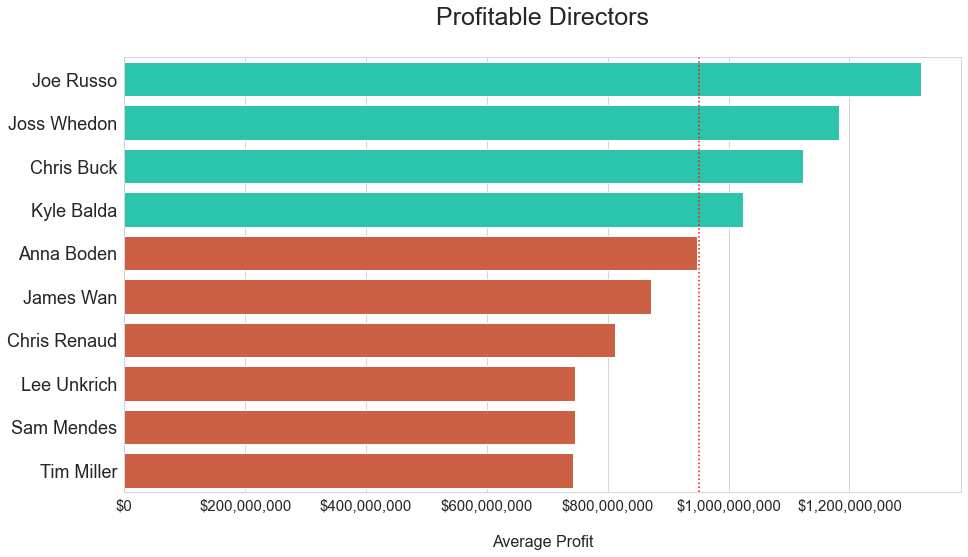

In [85]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')

money_mean = money_dir.values[:10].mean()

colur = np.where(money_dir.values[:10] > money_mean, '#10DFBC', '#E2522F')

axdir = sns.barplot(y=money_dir.index[:10], 
                      x=money_dir.values[:10], 
                      orient='h', 
                      palette=colur)
axdir.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
plt.title('Profitable Directors\n', fontsize = 25)
plt.ylabel('')
plt.xlabel('\nAverage Profit', fontsize = 16)
plt.yticks(fontsize=18)
plt.xticks(fontsize=15)
plt.axvline(money_mean, color='red', ls='dotted');